In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

listings_df = pd.read_csv("input/seattle/listings.csv", parse_dates =['host_since'])
calendar_df = pd.read_csv("input/seattle/calendar.csv", parse_dates = ['date'])
reviews_df = pd.read_csv("input/seattle/reviews.csv")

In [5]:
#display more rows and columns
pd.set_option('display.max_rows', 100) 
pd.set_option('display.max_columns', 100)

# 1. Business Understanding
1. What service does airbnb provide?
    Airbnb provides a platform for hosts to accommodate guests with short-term lodging and tourism-related activities.([wikipedia](https://en.wikipedia.org/wiki/Airbnb))
2. Who are the main customers for airbnb?
    1. hosts who provide the place to loding.
    2. guests who will take the place.
3. Airbnb grow really fast, what does airbnb provide compare to traditional hotel.
    Or what do the customers on airbnb interest in or care about?

In [6]:
print('The shape of data imported from listings.csv is {}'.format(listings_df.shape))
print('The shape of data imported from calendar.csv is {}'.format(calendar_df.shape))
print('The shape of data imported from reviews.csv is {}'.format(reviews_df.shape))


The shape of data imported from listings.csv is (3818, 92)
The shape of data imported from calendar.csv is (1393570, 4)
The shape of data imported from reviews.csv is (84849, 6)


# 2. Data Understanding
#### 1. listings_df contains the information for each host. It got 97 columns. We will see the column-names and the first 5 lines to try to get a clue.

In [7]:
print(listings_df.columns)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [8]:
listings_df.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

#### 2. We would go through some main categorical columns, see some distributations first.

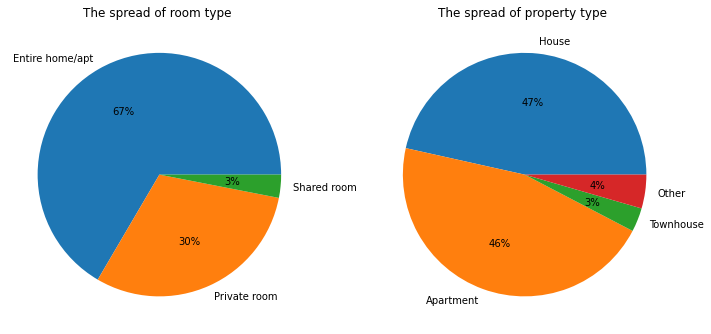

In [9]:
# count listing host for each room type
room_type_count = listings_df['room_type'].value_counts()

# count listing host for each property type
property_type_count = listings_df['property_type'].value_counts()

# remain the top 3 property type, sum up the rest as a type "other"
property_type_count = property_type_count[:3].append(\
                    pd.Series(property_type_count[4:].sum(),\
                    index = ['Other']))

# use subplots create two plot in a row
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (12,12))

# plot the first pie chart on the left
ax1.pie(room_type_count,labels = room_type_count.index, autopct='%1.0f%%')
ax1.set_title("The spread of room type ")

# plot the second pid chart on the right
ax2.pie(property_type_count,labels = property_type_count.index,autopct='%1.0f%%')
ax2.set_title("The spread of property type ")

# display 
plt.show()

#### 3. Since airbnb is just a platform, the host are not in professinal hotel business. So, how many days can they provide the room.


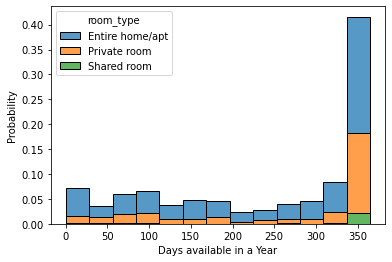

In [10]:
# 'availability_365' show how many day the host is available in a period of 365 days.
# we use histplot from seaborn package to label the propotion of each room type 
ax_avail = sns.histplot(listings_df[['availability_365','room_type']],\
            x = 'availability_365',\
            hue = 'room_type',\
            multiple = 'stack',\
            stat = 'probability')
ax_avail.set(xlabel = "Days available in a Year")
plt.show()

**Surprised** there are so many hosts are available for more than 300 days in a year. They almost take this as a business.

I am quite courious about the rest of the host, when do the rent the places? calendar should provide some usefull informaton.

In [22]:
calendar_df.head(10)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
5,241032,2016-01-09,f,NaN
6,241032,2016-01-10,f,NaN
7,241032,2016-01-11,f,NaN
8,241032,2016-01-12,f,NaN
9,241032,2016-01-13,t,$85.00


In [12]:
# in the calendar.csv file, if the host is no available ,the column "available" is "f", and the price is NaN.
# As we want to find out when do hosts avaiable, it is much simple to just drop the NaNs.
cal_df_dropna = calendar_df.dropna()

# merger listings_df to find out that does room type affect availablility
cal_avail_m = cal_df_dropna.merge(listings_df[['id','room_type']], left_on= 'listing_id', right_on = 'id')
cal_avail_m = cal_avail_m.groupby(['date','room_type'])['available'].count().reset_index()

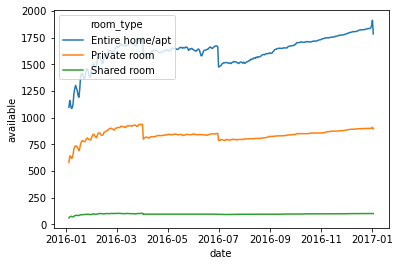

In [13]:
sns.lineplot(x = cal_avail_m['date'], y = cal_avail_m['available'], hue = cal_avail_m['room_type'])
plt.show()

- The plot do not follow some patterns as I expected, such like increase on vacations.
- "Entire home/apt" has the highest variance, while "shared room" is pretty stable.

In [14]:
listings_df[listings_df['room_type'] == 'Shared room']['availability_365'].mean()

entire_300host_list = ((listings_df['room_type'] == 'Entire home/apt') & (listings_df['availability_365'] > 300))
entire_300host_pct = entire_300host_list.sum()/listings_df.shape[0]

entire_300host_acc = (listings_df[entire_300host_list]['availability_365']*listings_df[entire_300host_list]['accommodates']).sum()
all_acc = (listings_df['availability_365']*listings_df['accommodates']).sum()
entire_300host_acc_pct = entire_300host_acc/all_acc
print(entire_300host_pct,entire_300host_acc_pct)

private_300host_list = ((listings_df['room_type'] == 'Private room') & (listings_df['availability_365'] > 300))
private_300host_pct = private_300host_list.sum()/listings_df.shape[0]
private_300host_acc = (listings_df[private_300host_list]['availability_365']*listings_df[private_300host_list]['accommodates']).sum()
private_300host_acc_pct = private_300host_acc/all_acc
#listings_df[(listings_df['room_type'] == 'Entire home/apt') and (listing_df['availability_365'] > 300)].shape
#listings_df[listings_df['room_type'] == 'Shared room']['availability_365'].quantile(0.2)


0.3122053431115767 0.5441693742145101


#### 4. Price should be the main reason people choose airbnb, let take a look on the price.

In [23]:
def price_clean(df, col_list):
    """ convert price string (with $ and ",") into integer, fill Nan with 0.
    Parameters
    -------
    df : DataFrame
        The DataFrame needed to be converted.
    col_list : List
        List of columns names going to be converted.
    
    Returns
    -------
    df : DataFrame
        The DataFrame after convertion
        
    """
    # remove "$ , .00"
    df[col_list] = df[col_list].fillna(0).replace({"\$|\,|\.00$": ""}, regex = True)
    df[col_list] = df[col_list].astype('int')
    return df

# clean 'price','cleaning_fee','extra_people' columns 
listings_df=price_clean(listings_df,['price','cleaning_fee','extra_people'])

# caculate the price per accommodation.
listings_df['price_peracc'] = listings_df['price']/listings_df['accommodates']

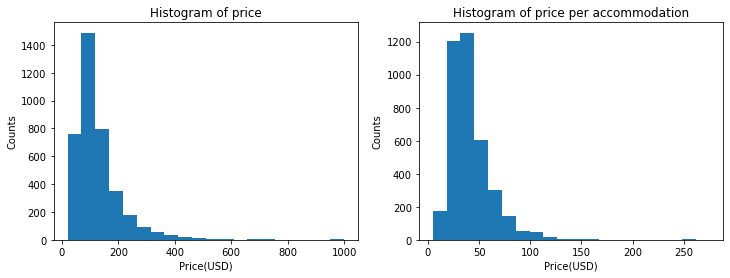

In [24]:
# create histogram for "price" and "price per accommodation"
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (12,4))
# hist "price"
ax1.hist(listings_df['price'],bins = 20)
ax1.set_title("Histogram of price")
ax1.set_xlabel("Price(USD)")
ax1.set_ylabel("Counts")
# hist "price per accommodation"
ax2.hist(listings_df['price_peracc'],bins =20)
ax2.set_title("Histogram of price per accommodation")
ax2.set_xlabel("Price(USD)")
ax2.set_ylabel("Counts")
plt.show()

In [17]:
# print the mean ,hightest and stand deviation for "price" and "price per accommodation"
print('The mean price is {}, the highest price is {}, the standard deviation is {}'\
      .format(round(listings_df['price'].mean(),2),\
              listings_df['price'].max(),\
             round(listings_df['price'].std(), 2)))

print('The mean price per accommodation is {}, the highest price is {}, the standard deviation is {}'\
      .format(round(listings_df['price_peracc'].mean(),2),\
              listings_df['price_peracc'].max(),\
             round(listings_df['price_peracc'].std(),2)))

The mean price is 127.98, the highest price is 1000, the standard deviation is 90.25
The mean price per accommodation is 41.27, the highest price is 275.0, the standard deviation is 20.68


### 5. find out the spread of bedrooms and accommodates.

In [18]:
# Select the hosts which have more than 2 reviews
review_3_list = listings_df['number_of_reviews'] >= 3
listings_review3 = listings_df[review_3_list]

In [19]:
# count hosts(with more than 2 reviews) for each number of accommodates
accommodates_count = listings_reivew3['accommodates'].value_counts()
# count hosts (with more than 2 reviews) for each number of accommodates
bedroom_count = listings_reivew3['bedrooms'].value_counts()
bedroom_count_name = list(map(int, bedroom_count.index.to_list()))
bedroom_count.index = bedroom_count_name
bedroom_count.name = "Bedrooms"
# keep the top 3 bedroom count, group the rest as ">3"
bedroom_count = bedroom_count[:3].append(pd.Series(bedroom_count[4:7].sum(), index = [">3"]))
# keep the top 5 bedroom count, group the rest as ">6"
accommodates_count = accommodates_count[:5].append(pd.Series(accommodates_count[6:].sum(), index = [">6"]))
accommodates_count.name = "accommodates"

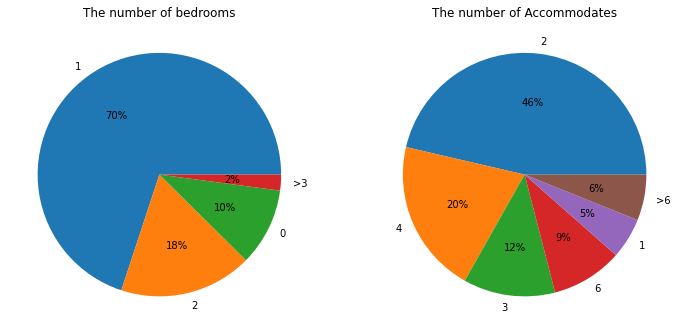

In [26]:
# plot the spread of "number of bedrooms" and "number of accommodates"
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12,12))
ax1.pie(bedroom_count, labels = bedroom_count.index, autopct = '%1.0f%%')
ax1.set_title("The number of bedrooms")
ax2.pie(accommodates_count, labels = accommodates_count.index, autopct = '%1.0f%%')
ax2.set_title("The number of Accommodates")
plt.show()

### 6. Plot the histplot of revies_scores_rating for each hosts

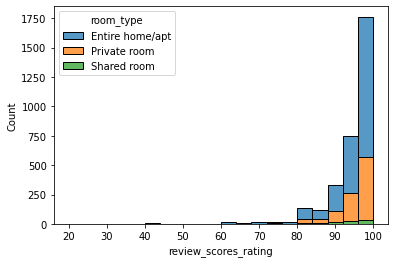

In [14]:

sns.histplot(listings_df[['review_scores_rating','room_type']],\
             x = 'review_scores_rating',\
            hue = 'room_type',\
             bins = 20,\
            multiple = 'stack')
plt.show()



### 7. How do each type of review score affect the review score rating.

In [28]:
# select out the columns with keyword "review"
review_scores_df = listings_df.loc[:,listings_df.columns.str.contains('review')].copy()
review_scores_df.dropna(how = 'all', inplace = True)
review_scores_df.describe()


,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,3191.000000
mean,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,2.078919
std,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,1.822348
min,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,0.020000
25%,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,0.695000
50%,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.540000
75%,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,3.000000
max,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,12.150000


In [29]:
# As we see from discribe method, the cout of each kind of reviews are pretty close. We guess that:
# These host don't got reviews at all. So we try to drop all na, and see the result.
review_scores_df_drop = review_scores_df.dropna(axis = 0)
review_scores_df_drop.describe()

,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,3158.000000,3158.000000,3158.000000,3158.000000,3158.000000,3158.000000,3158.000000,3158.000000,3158.000000
mean,26.856555,94.538949,9.636795,9.556048,9.786574,9.810956,9.608930,9.452185,2.095573
std,39.962629,6.597547,0.697614,0.797442,0.595663,0.559464,0.628746,0.750099,1.823821
min,1.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,0.020000
25%,4.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,0.710000
50%,13.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.555000
75%,32.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,3.017500
max,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,12.150000


compare to the dataframe before dropna, quite a few useful row droped. So we will use dropna.

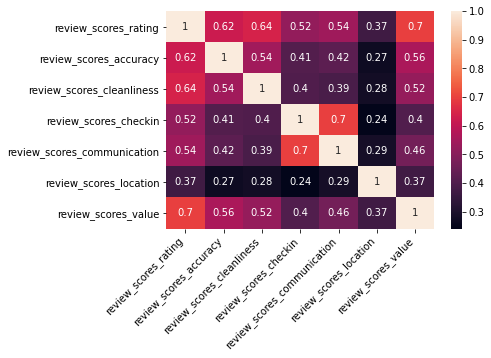

review_scores_rating           1.000000
review_scores_value            0.696288
review_scores_cleanliness      0.642380
review_scores_accuracy         0.622438
review_scores_communication    0.543626
review_scores_checkin          0.521914
review_scores_location         0.368714
Name: review_scores_rating, dtype: float64

In [34]:
# build the heatmap for each kind of review scores.
review_corr = review_scores_df_drop.drop(['reviews_per_month','number_of_reviews'], axis = 1).corr()
sns.heatmap(review_corr, annot = True)
plt.xticks(rotation = 45,ha = 'right')
plt.show()
review_corr['review_scores_rating'].sort_values(ascending = False)

# 3. Data Prepartion

1. "amenities" offers a lot a detailed information about the house, May be that will affect the value score.
We will prepare "amenities" column for dummy variable.

In [35]:
# use general express to remove "{},"",'' ".
listings_df['amenities'] = listings_df['amenities'].str.replace("{|}|\"|\'", "", regex = True)

We try to fit review_scores_value into a linearregression model, and find out what affects review score on value most.

In [36]:
# build a list contain the numeric columns.
value_num_list =['review_scores_value', 'accommodates', 'bedrooms','availability_365' ,'bathrooms', 'beds','price', 'guests_included', 'cleaning_fee' ,'extra_people','minimum_nights','maximum_nights']
# build a list contain categorical columns.except "amenities"
value_cat_list = ['property_type','room_type', 'neighbourhood_cleansed','bed_type', 'host_is_superhost', 'host_identity_verified']
# creat a dataframe contains numeric , categorical and "amenities" columns
value_df = listings_df[value_num_list + value_cat_list + ['amenities']].copy()

# As we build model for "review_scores_value" ,we dropna for that columns.
value_df.dropna(subset = ['review_scores_value'] ,axis = 0, inplace = True)

# creat y for linear model
y = value_df['review_scores_value'].copy()

# fill numeric columns with "0" for na.
for col in value_num_list:
    value_df[col].fillna(0, inplace = True)
# create dummies variables for  categorical columns with dummy_na = True.
for col in value_cat_list:
    value_df = pd.concat([value_df.drop(col, axis =1), pd.get_dummies(value_df[col], prefix = col, prefix_sep = "__", drop_first = True, dummy_na = True )], axis = 1)
# because  the value in amenities columns have many feature seprate with ",", we use str.get_dummies to create dummy variable.
amenities_dummies = value_df['amenities'].str.get_dummies(sep = ',')
amenities_dummies.columns = "amenities__"+amenities_dummies.columns

# creat X for model.
X = pd.concat([value_df.drop('amenities', axis =1),amenities_dummies], axis = 1).drop('review_scores_value' ,axis = 1)

# split X,y into train and test group.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3,random_state= 42)

# 4. Modeling

In [38]:
# use linearRegression
model = LinearRegression()
model.fit(X_train,y_train)

# print the model score
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))



0.18131850610943867
0.05930763481543144


The score of the model is not ideal.

In [39]:
# build a dataframe to store coef name and coef value
coef = pd.DataFrame({"X":X_train.columns.str.split("__"), "coef":model.coef_ })

# new columns for the abs of coef value
coef['coef_abs'] = coef['coef'].abs()

# split X names for futher anaylis
coef['X_group']= coef['X'].apply(lambda x:x[0])
coef['X_sub'] = coef['X'].apply(lambda x:x[-1])

group_name_list = coef['X_group'].unique()

# get top 5 for each kind of dummy variable
coef_top5 = pd.DataFrame()
for var in group_name_list:
    coef_top5 = coef_top5.append(coef[coef['X_group'] == var].sort_values("coef_abs",ascending = False)[:4])
coef_top5 =coef_top5.sort_values("coef_abs", ascending = False)    

# get top 20 highest coef values.
coef_top20 = coef_top5[['X_group', 'X_sub', 'coef', 'coef_abs']].head(20)
coef_top20

,X_group,X_sub,coef,coef_abs
18,property_type,Dorm,0.671028,0.671028
64,neighbourhood_cleansed,Laurelhurst,0.631926,0.631926
115,neighbourhood_cleansed,Yesler Terrace,0.617212,0.617212
93,neighbourhood_cleansed,Riverview,-0.573326,0.573326
101,neighbourhood_cleansed,South Park,-0.520179,0.520179
119,bed_type,Pull-out Sofa,0.477122,0.477122
117,bed_type,Couch,0.422522,0.422522
22,property_type,Tent,0.408138,0.408138
118,bed_type,Futon,0.401420,0.401420
15,property_type,Camper/RV,-0.381045,0.381045


The model accuracy isnot good enough, but we can still find some usefull information.